In [65]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from itertools import chain

In [66]:
# Create pandas dataframe from csv
df = pd.read_csv("../Material/Data/WFPP.csv", sep=",", header=None, names=["ID", "Name", "Pseudonyms", "Link", "Picture", "Jobs", "Lived in", "Born", "Died"])

In [67]:
# Helper function that renders the value of a bar on the bar
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() - 0.25
            value = '{:.0f}'.format(p.get_width())
            ax.text(_x, _y, value, ha="center", size=10) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

In [68]:
# Print a short overview of the dataframe
df

,ID,Name,Pseudonyms,Link,Picture,Jobs,Lived in,Born,Died
0,21229,Abby Meehan,NaN,https://wfpp.columbia.edu/person/abby-meehan/,NaN,director|writer>journalist,England,1853,1931
1,1342,Ada Aline Urban,Ada Gorecki|Ada Aline Jones,https://wfpp.columbia.edu/person/ada-aline-urban/,https://wfpp.columbia.edu/wp-content/uploads/2...,business partner>business co-owner|company dir...,England|United States,May 15 1868,1937
2,1704,Ada Egede-Nissen,Ada Kramm,https://wfpp.columbia.edu/person/ada-egede-nis...,NaN,actress>film actress|actress>theatre actress,Germany|Norway,1899,1981
3,1337,Adela Rogers St. Johns,Nora Adela Rogers|Adela Rogers Saint Johns|Ade...,https://wfpp.columbia.edu/person/adela-rogers-...,https://wfpp.columbia.edu/wp-content/uploads/2...,writer>journalist|writer>novelist|writer>scree...,United States,May 20 1894,August 10 1988
4,1344,Adela Sequeyro,Perlita|Adela Sequeyro Haro|Mrs. Mario Tenorio,https://wfpp.columbia.edu/person/adela-sequeyr...,https://wfpp.columbia.edu/wp-content/uploads/S...,director|actress>film actress|film company own...,Mexico,March 11 1901,December 24 1992
...,...,...,...,...,...,...,...,...,...
295,16243,Xie Caizhen,謝采貞,https://wfpp.columbia.edu/person/xie-caizhen/,https://wfpp.columbia.edu/wp-content/uploads/2...,director|actress>film actress,China,Unknown,Unknown
296,20995,Yan Shanshan,嚴珊珊|嚴淑姬|絳貞|誠意|Yim San-san|Lily Yam,https://wfpp.columbia.edu/person/yan-shanshan/,https://wfpp.columbia.edu/wp-content/uploads/2...,agent|business partner>business co-owner|actre...,China|Hong Kong,October 22 1896,August 2 1951
297,16184,Yang Naimei,楊耐梅|Yang Lizhu/楊麗珠,https://wfpp.columbia.edu/person/yang-naimei/,https://wfpp.columbia.edu/wp-content/uploads/2...,costume designer|actress>film actress|film com...,China,1904,February 27 1960
298,20512,Zinaida Brumberg,Zinaida Semyonovna Brumberg,https://wfpp.columbia.edu/person/zinaida-semyo...,https://wfpp.columbia.edu/wp-content/uploads/2...,animator|consultant>artistic council member|di...,Russia|Soviet Union,August 2 1900,February 9 1983


In [69]:
df = (df.set_index(['ID', 'Name', 'Pseudonyms', 'Link', 'Picture', 'Jobs', 'Born', 'Died']).stack().str.split('|', expand=True).stack().unstack(-2).reset_index(-1, drop=True).reset_index())

In [70]:
# Group by the countries each person lived in and count it
df_countries = df.groupby("Lived in", as_index=False).count()
df_countries.head()

,Lived in,ID,Name,Pseudonyms,Link,Picture,Jobs,Born,Died
0,Argentina,1,1,1,1,1,1,1,1
1,Australia,15,15,11,15,11,15,15,15
2,Austria,3,3,3,3,2,3,3,3
3,Brazil,3,3,3,3,3,3,3,3
4,Canada,8,8,7,8,7,8,8,8


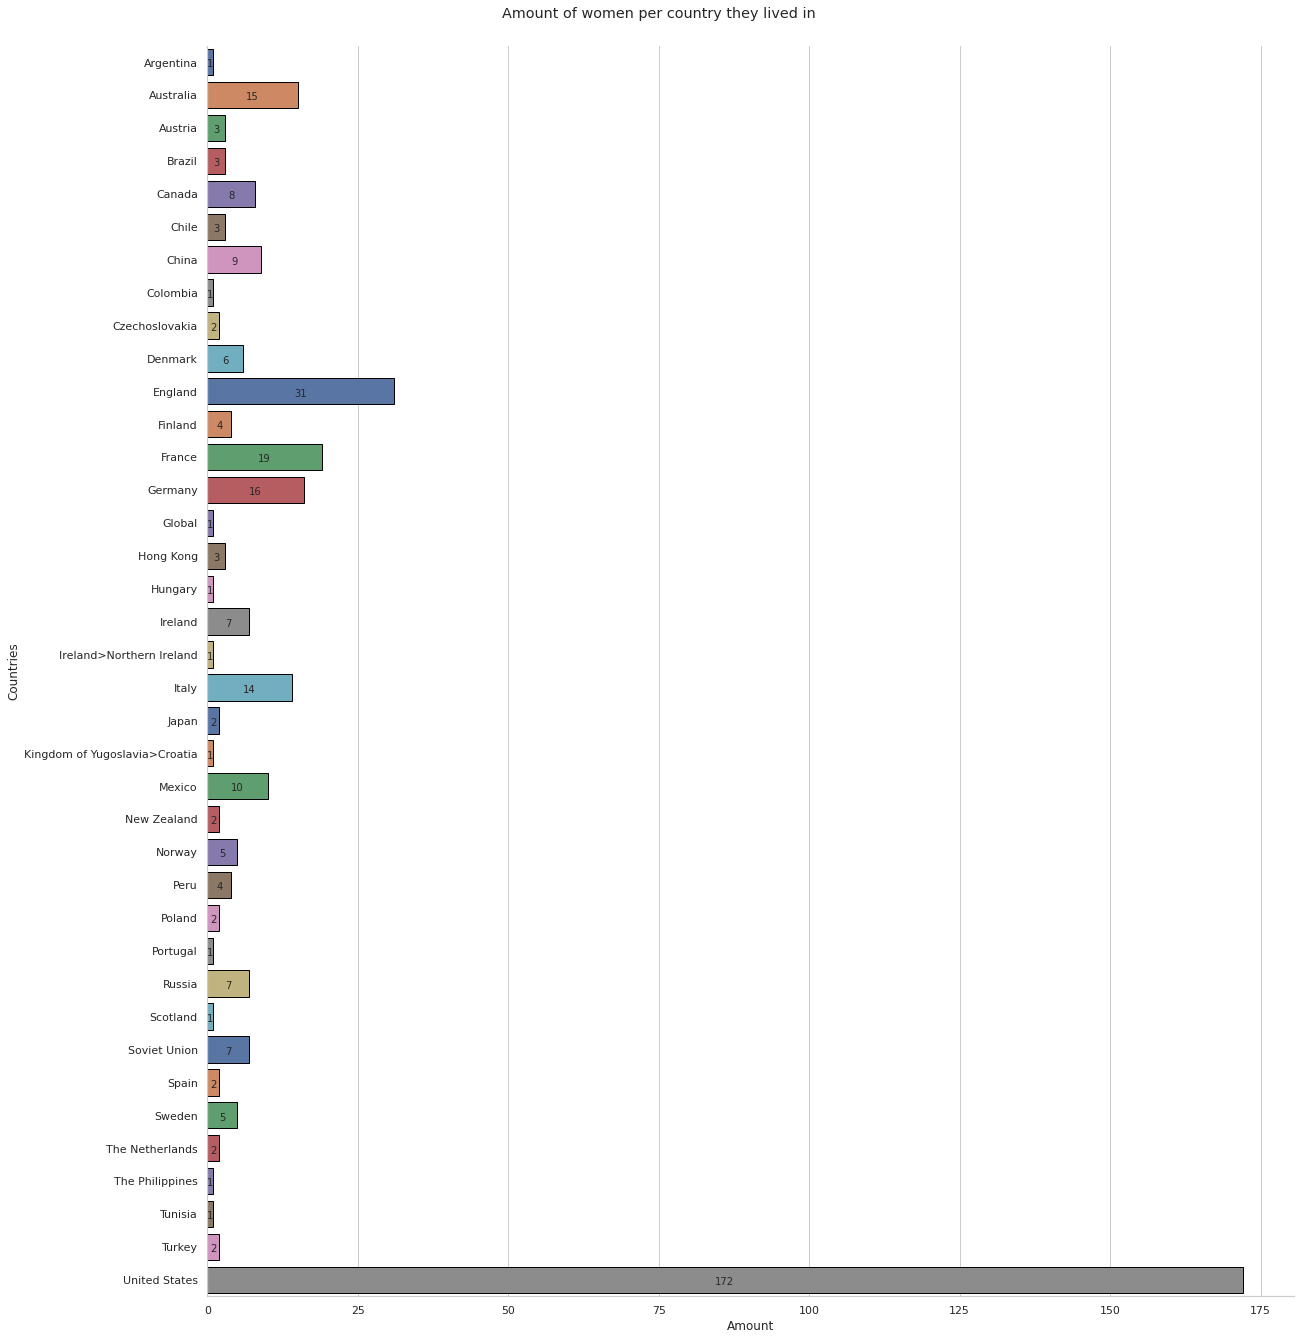

In [71]:
# Pre style setting (can be changed depending on what looks more appropriate)
sns.set_style("whitegrid")
sns.set_context("notebook")
# Render a bar plot
country_plt = sns.catplot(
    x="ID",
    y="Lived in", 
    data=df_countries, 
    kind="bar",
    palette="deep",
    edgecolor="black", 
    height=18, 
    )
country_plt.set_xlabels("Amount")
country_plt.set_ylabels("Countries")
country_plt.fig.suptitle("Amount of women per country they lived in", y=1.02)
show_values_on_bars(country_plt.axes)

# If plot is ok, save it to a file
plt.savefig('../Plots/country_plot.png', bbox_inches='tight')